In [26]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.6 MB/s eta 0:00:00


In [62]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


Abstract

this datasets goal is to identify the mobile price range.
it has a variety of features including ram, battery power, bluetooth, memory to determine the price range

the total number of predictor variables are 20
the target variable, price_range has 4 categories:
0 - Low Cost

1 - Medium Cost
2 - High Cost
3 - Very High Cost



In [27]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import h2o
from h2o.automl import H2OAutoML

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jayanti-neu/dsem-assignment3/main/train.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.shape

(2000, 21)

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we can see no preprocessing is required as there are no null values in the dataset.

In [10]:
df.duplicated().any()

False

In [12]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: >

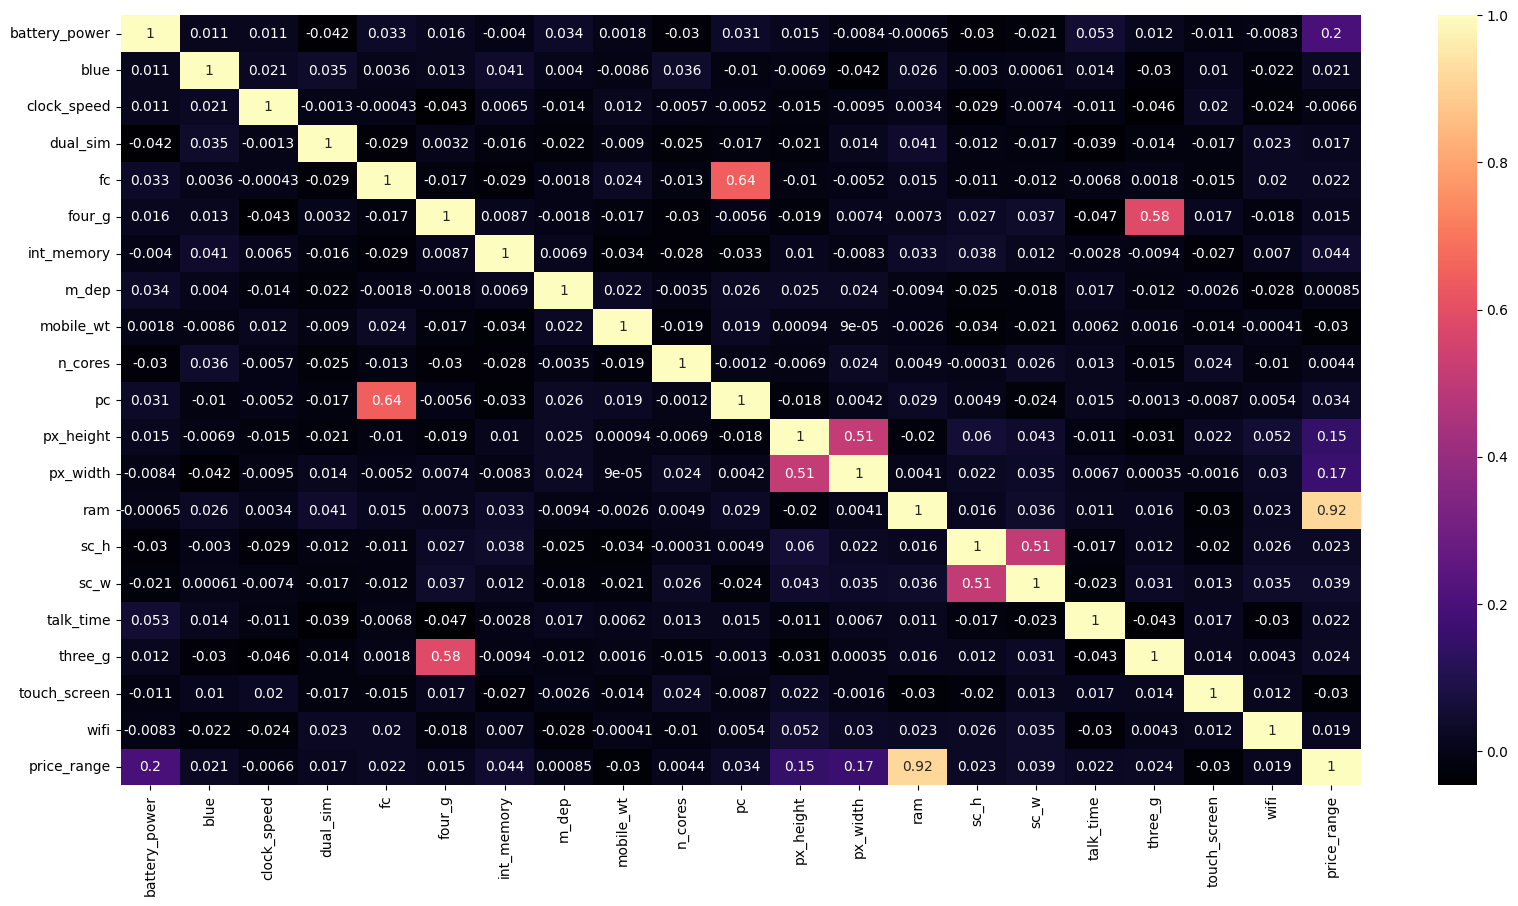

In [17]:
corr = df.corr()
plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='magma')

The highest correlations to target variable (price_range) are:

*  ram
*  battery_power
*  px_width
*  px_height










---------------------------
# Test train split

In [66]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

In [68]:
print(X_train.shape , X_test.shape)

(1400, 20) (600, 20)


# 1) Logistic Regression

It is used for datasets with categorical outcomes. Using a sigmoid function it can classify binary outcomes. It can also be explanded to solve multiclass classicication datasets using OvR.

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

Printing the coefficients of each logistic regression model

In [70]:
# Make predictions on the scaled test dataset
y_pred = logreg.predict(X_test_scaled)

In [71]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8083333333333333


Hence out of all the instances in the test dataset, around 80.8% were classified correctly by our logistic regression model.

In [72]:
# Print the coefficients for each binary logistic regression model
for i, coef in enumerate(logreg.coef_):
    print(f"Coefficients for class {i}:")
    for feature, weight in zip(X.columns, coef):
        print(f"{feature}: {weight:.3f}")
    print("\n")

Coefficients for class 0:
battery_power: -2.000
blue: 0.063
clock_speed: 0.110
dual_sim: 0.001
fc: -0.019
four_g: 0.062
int_memory: -0.234
m_dep: 0.054
mobile_wt: 0.116
n_cores: 0.127
pc: -0.034
px_height: -1.227
px_width: -1.092
ram: -8.063
sc_h: 0.162
sc_w: -0.019
talk_time: -0.041
three_g: -0.080
touch_screen: 0.039
wifi: 0.072


Coefficients for class 1:
battery_power: -0.016
blue: -0.014
clock_speed: -0.040
dual_sim: 0.122
fc: 0.007
four_g: -0.021
int_memory: 0.068
m_dep: 0.106
mobile_wt: -0.011
n_cores: -0.154
pc: 0.028
px_height: 0.032
px_width: 0.001
ram: -0.612
sc_h: -0.028
sc_w: -0.008
talk_time: 0.093
three_g: 0.031
touch_screen: -0.011
wifi: 0.036


Coefficients for class 2:
battery_power: -0.140
blue: -0.058
clock_speed: -0.023
dual_sim: -0.051
fc: 0.138
four_g: -0.171
int_memory: -0.107
m_dep: -0.065
mobile_wt: 0.153
n_cores: 0.109
pc: -0.082
px_height: 0.023
px_width: -0.063
ram: 0.620
sc_h: -0.123
sc_w: 0.047
talk_time: 0.014
three_g: 0.149
touch_screen: -0.023
wifi: -0

The coefficient value indicates the effect of the corresponding feature on the **log-odds** of belonging to the respective class.

**Positive coefficients** indicate that an increase in the feature value makes it more likely to belong to the class, while **negative coefficients** indicate the opposite.

The magnitude of the coefficient represents the strength of the effect. Larger magnitude coefficients have a more significant impact on the prediction.

Taking the example of ram which is one of the significant predictors :

* In the first set of coefficients **class 0**:  higher
value of 'ram' has a large negative coefficient (-8.063), indicating that higher RAM is associated with a lower likelihood of belonging to class 0

* **class 1**: 'ram' also has a negative coefficient (-0.612), but the magnitude is smaller, indicating a weaker effect compared to class 0.

* **class 2**: The most significant coefficient is of ram, with a positive value, which means that starting class 2, the increase in ram value will increase the probability of the class.

* **class 3**: All battery_power, px_height, px_width, and ram are the variables with the most significant positive coefficients, which means that increase in their values will highly increase the probability of getting this class

# Shap analysis for logistic regression

In [121]:
import shap

explainer = shap.Explainer(logreg, X_train)

linear_shap_values = explainer(X_train)

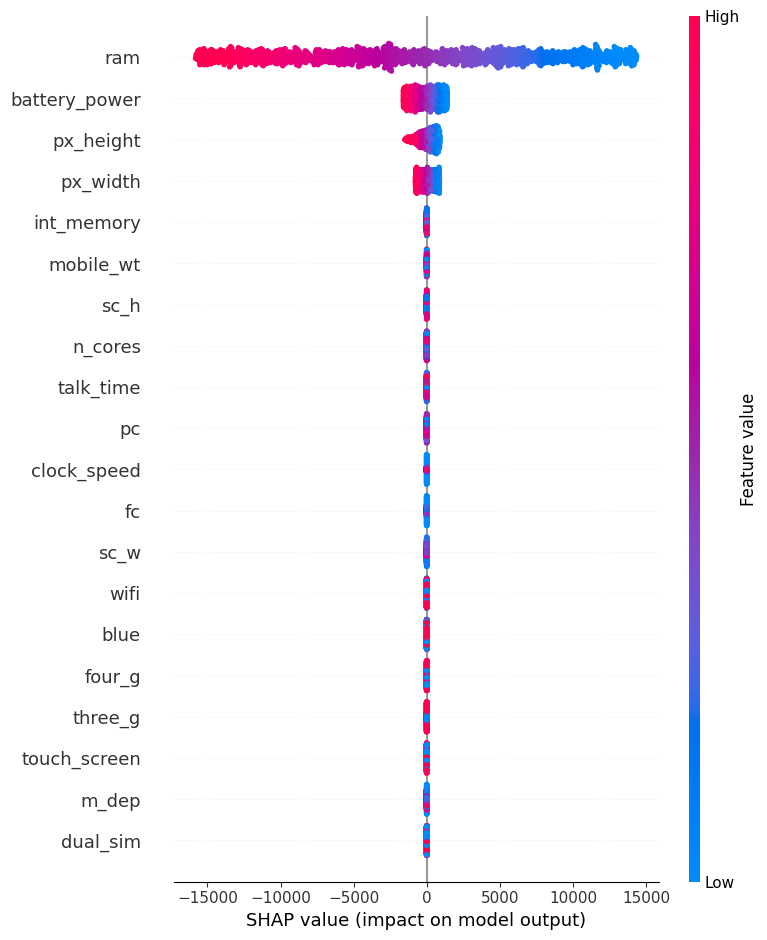

In [74]:
class_index = 0

shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

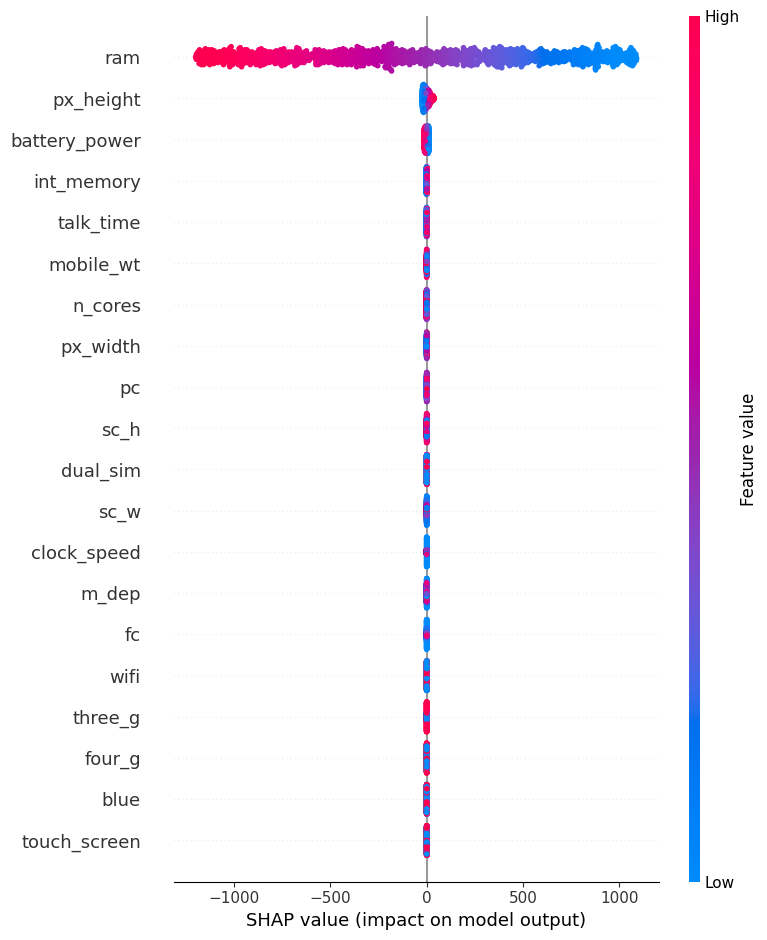

In [75]:
# Choose the class index
class_index = 1

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)


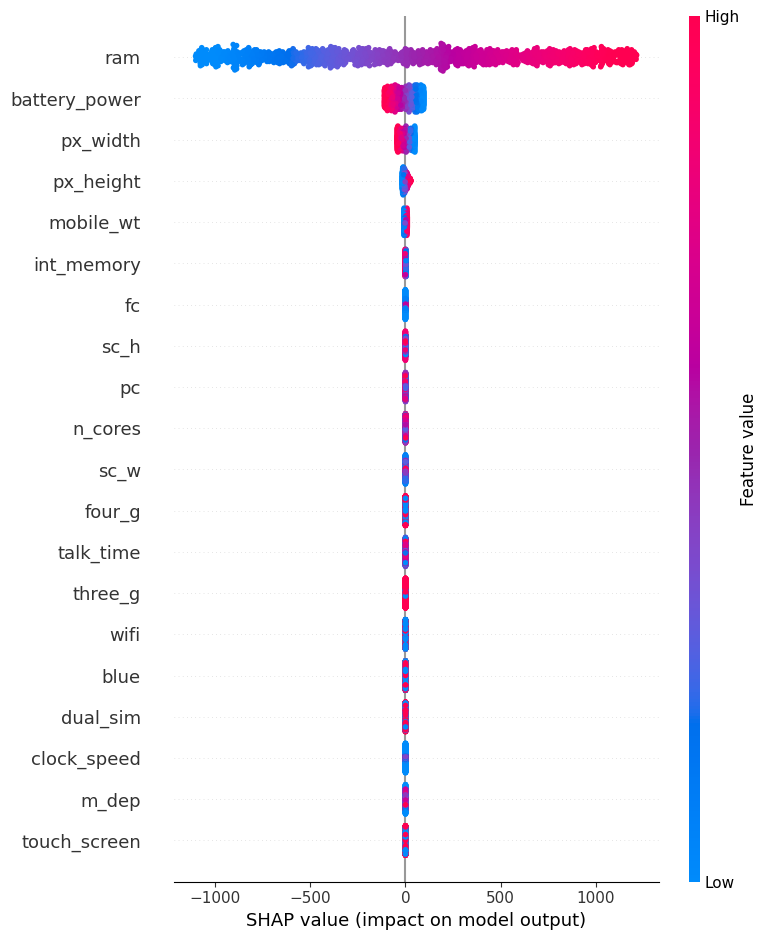

In [76]:
# Choose the class index
class_index = 2

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

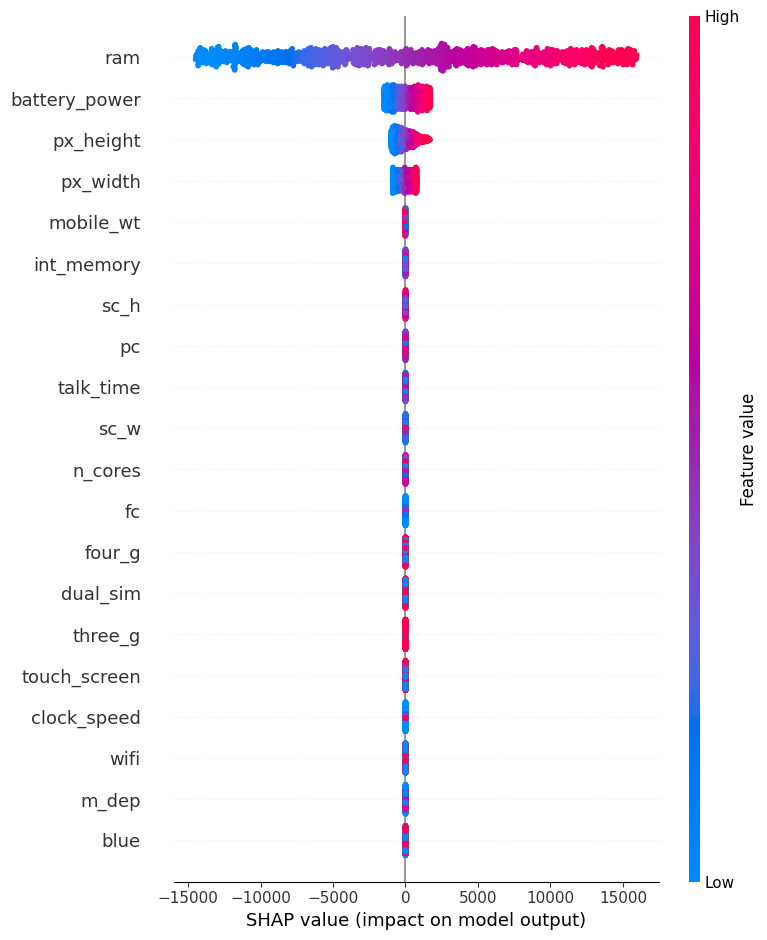

In [77]:
# Choose the class index
class_index = 3

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

* class 0: looking at the shap values for the most significant features they show a strong negative trend which means that their increase will reduce the likelihood of this class.
* class 1: it is observed that ram and px_width show a negative trend, while battery_power and px_height show a somewhat positive trend. the increase in battery_power and px_height will increase the likelihood of this class, even if by a little.
* class 2: ram shows a strong positive trend, while px_height and mobile_wt show a little positive trend. battery_power and px_width still show negative trend
* class 3:  all the significant features show a very strong positive trend, which in this case, indicates that an increase in any one of their values will highly increase the likelihood of the occurence of this class

# Tree based model

Decision trees are a flexible and powerful tool for multiclass classification, offering a balance between interpretability, performance, and ease of use

Decision trees can carry out feature selection automatically by determining the most significant features for generating correct predictions. This can aid in identifying the primary factors behind the target variable while also reducing the dataset’s complexity

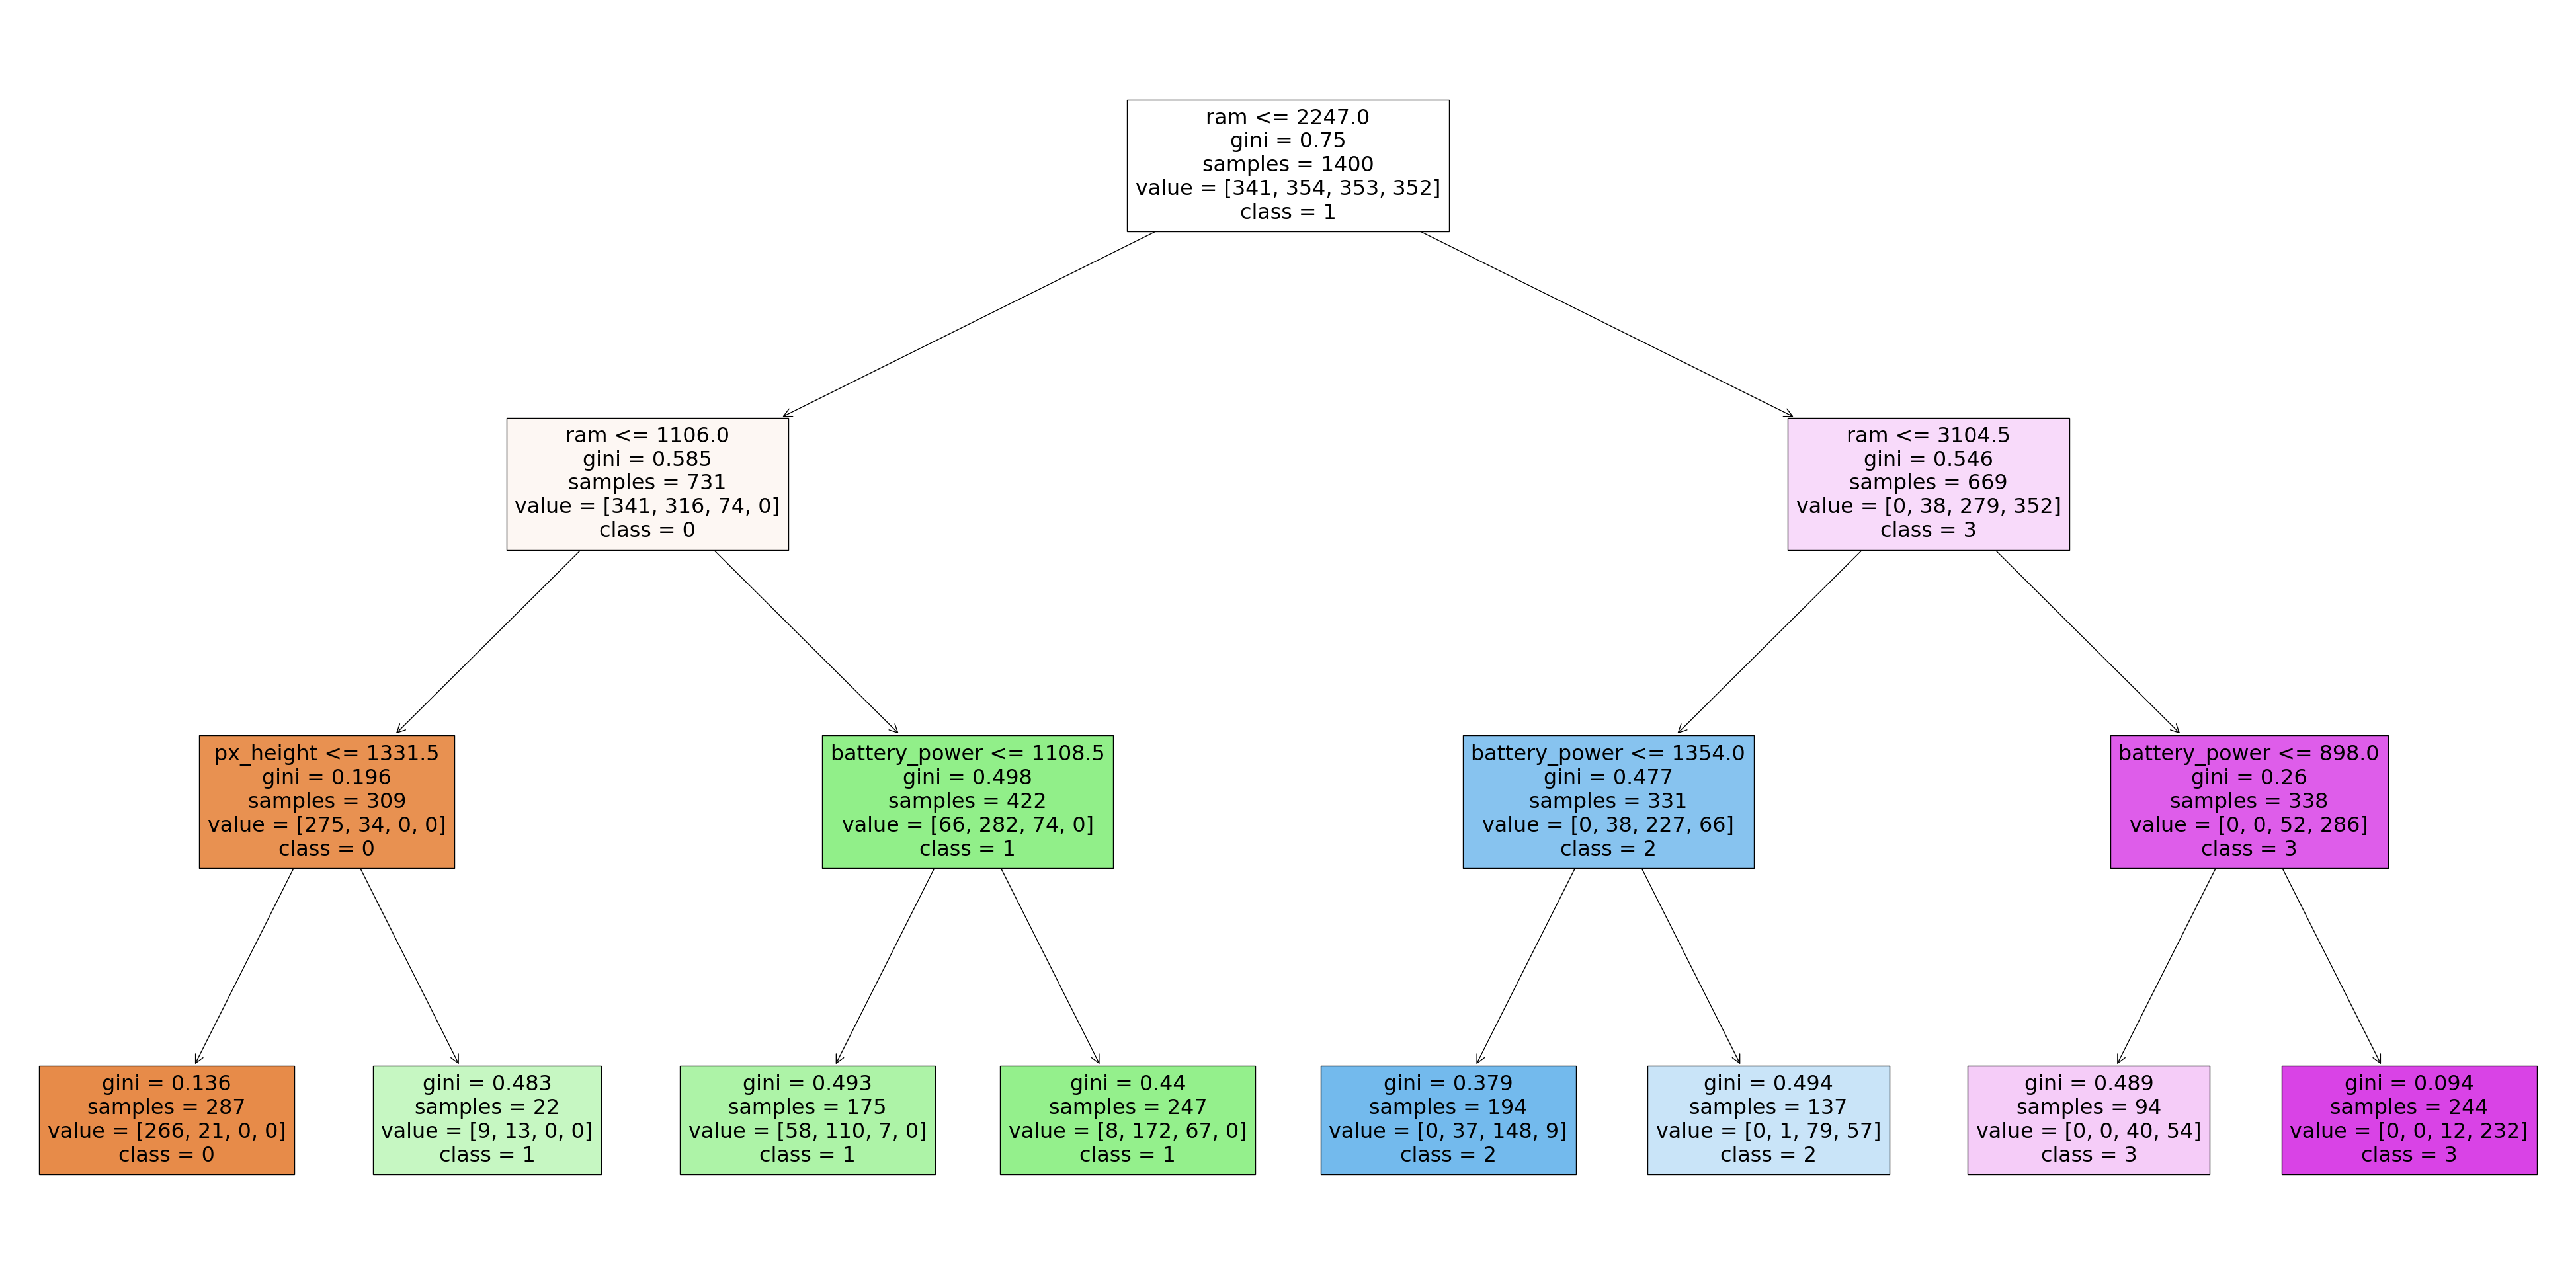

In [78]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_train, y_train)

plt.figure(figsize=(50,25))
plot_tree(dtc, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

Interpretation of the decision tree classifier:

We can see there are 3 levels of the decision tree classifier and the tree is split from the root node of **ram** which suggests **ram** is the most important feature.

* In the **first level**, gini index of both nodes is lower
than root node. This indicates that the split is appropriate. also the samples are almost even which suggests a balanced split.

* On the second level, gini of both nodes is still lower than root node gini. also the samples are evenly divided among the 4 nodes.  also notice that the second level contains all the classes of the target variable.

* on the third level, gini score is uneven and increased from the second level which is not good. This also suggests that the split at this level may not be as effective in reducing impurity.

Conclusion - decision tree is good uptill the second level depth, capturing important patterns and making appropriate splits. at deeper levels there are possibilities of uneven splits and overfitting

In [79]:
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.755


Our decision tree model correctly predicted the class labels for approximately 75.5% of the instances in the test dataset.

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85       159
           1       0.61      0.79      0.69       146
           2       0.67      0.61      0.64       147
           3       0.86      0.84      0.85       148

    accuracy                           0.76       600
   macro avg       0.77      0.75      0.76       600
weighted avg       0.77      0.76      0.76       600



f1 score: balances precision and recall.for class 1 and 3 it indicates good overall performace. while especially lower for class 2 indicating room for improvement.  

# shap analysis for the tree based model

In [97]:
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_train)

print('Expected Value:', explainer.expected_value)

Expected Value: [0.24357143 0.25285714 0.25214286 0.25142857]


These values represents the expected value for each class label in the model's output.

In [104]:
explainer = shap.TreeExplainer(dtc)

In [105]:
X_sample = X_train.sample(100)  # Adjust sample size as needed
shap_values = explainer.shap_values(X_sample)

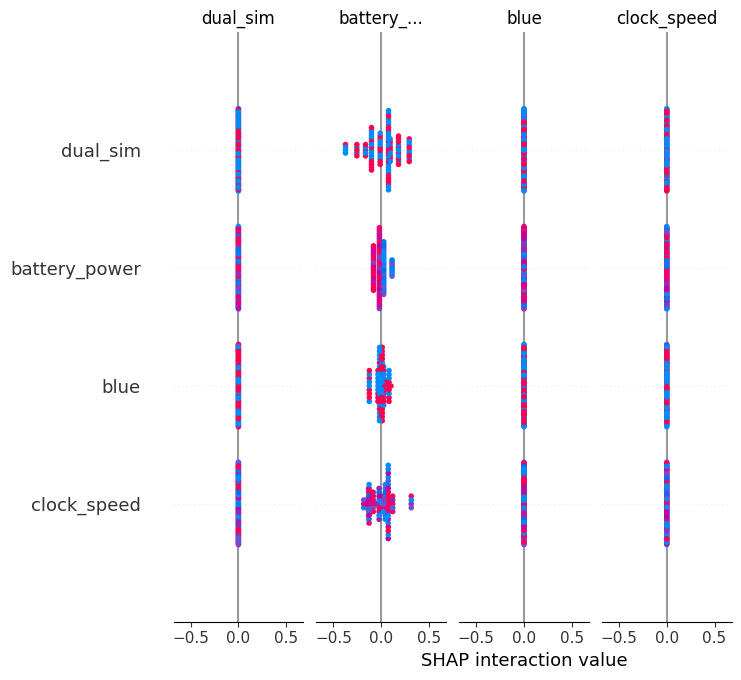

In [107]:
shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

The color intensity on the bar represents the average absolute SHAP value for a feature. Higher absolute values (darker colors) indicate greater feature importance. Positive values (reddish) mean the feature generally pushes the model's prediction towards a higher class value, while negative values (bluish) mean it pushes the prediction towards a lower class value.


 from the output above it appears that clock_speed is the most important feature overall, followed by battery_power

Random forest classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf0= RandomForestClassifier(n_estimators=100,random_state=1200)
clf0.fit(X_train,y_train)
std = np.std([tree.feature_importances_ for tree in clf0.estimators_], axis=0)
feature_importances = pd.Series(clf0.feature_importances_, index=X_train.columns)

print('Score of RF model on test split\n',clf0.score(X_test,y_test))

Score of RF model on test split
 0.8733333333333333


In [119]:
explainer = shap.TreeExplainer(clf0)
shap_values = explainer.shap_values(X_train)

print('Expected Value:', explainer.expected_value)

Expected Value: [0.24342143 0.25356429 0.25030714 0.25270714]


# AutoMl

can automatically select the most suitable machine learning algorithm.

In [41]:
h2o.init()
data = h2o.H2OFrame(df)

data.head()
pct_rows = 0.80
data_train, data_test = data.split_frame([pct_rows])

y = 'price_range'
X = data.columns
X.remove(y)

run_time = 600
aml = H2OAutoML(max_models=10, max_runtime_secs=run_time, seed=1)

aml.train(x=X, y=y, training_frame=data_train)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 49 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_5yv258
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.156 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [42]:
from sklearn.metrics import r2_score
import warnings

# Get the leaderboard
leaderboard = aml.leaderboard

for i in range(leaderboard.nrows):
    model_id = leaderboard[i, "model_id"]
    model = h2o.get_model(model_id)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        predictions = model.predict(data_test).as_data_frame()
        true_values = data_test[y].as_data_frame()
        r2 = r2_score(true_values, predictions)
    print(f"Model {model_id}: R^2 score = {r2:.4f}")

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Model StackedEnsemble_AllModels_1_AutoML_3_20240318_04016: R^2 score = 0.9450


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Model StackedEnsemble_BestOfFamily_1_AutoML_3_20240318_04016: R^2 score = 0.9450


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_3_AutoML_3_20240318_04016: R^2 score = 0.9390


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_4_AutoML_3_20240318_04016: R^2 score = 0.9367


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_1_AutoML_3_20240318_04016: R^2 score = 0.9349


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_2_AutoML_3_20240318_04016: R^2 score = 0.9336


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Model XGBoost_3_AutoML_3_20240318_04016: R^2 score = 0.9323


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model DRF_1_AutoML_3_20240318_04016: R^2 score = 0.9293


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model XRT_1_AutoML_3_20240318_04016: R^2 score = 0.9266


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GLM_1_AutoML_3_20240318_04016: R^2 score = 0.9191


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Model XGBoost_1_AutoML_3_20240318_04016: R^2 score = 0.8170


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Model XGBoost_2_AutoML_3_20240318_04016: R^2 score = 0.9188


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

The highest R2 is stacked ensemble but it combines all the models and is not good for shap analysis. Besides ensemble models an R^2 score = 0.9390 for the model **Model GBM_3_AutoML_3_20240318_04016** suggests that the model is best in capturing the underlying patterns and relationships in the data.

In [43]:
leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20240318_04016,0.266758,0.0711597,0.200387,0.133326,0.0711597
StackedEnsemble_BestOfFamily_1_AutoML_3_20240318_04016,0.267725,0.0716768,0.201917,0.134472,0.0716768
GBM_3_AutoML_3_20240318_04016,0.282106,0.0795835,0.212158,0.143941,0.0795835
GBM_4_AutoML_3_20240318_04016,0.286644,0.0821646,0.215636,0.144833,0.0821646
GBM_1_AutoML_3_20240318_04016,0.287399,0.0825981,0.236737,0.150442,0.0825981
GBM_2_AutoML_3_20240318_04016,0.28957,0.0838509,0.221828,0.146948,0.0838509
XGBoost_3_AutoML_3_20240318_04016,0.292299,0.0854386,0.216455,0.144872,0.0854386
DRF_1_AutoML_3_20240318_04016,0.304447,0.0926882,0.236428,0.156558,0.0926882
XRT_1_AutoML_3_20240318_04016,0.314177,0.0987071,0.248406,0.163777,0.0987071
GLM_1_AutoML_3_20240318_04016,0.324714,0.105439,0.271933,0.204509,0.105439


# SHAP Analysis

The goal of SHAP analysis is to simplify complex machine learning models by figuring out how much each feature adds to the prediction for each case.

It allows us to understand the specific contributions of each feature for a given prediction.

# Shap analysis of the best AutoMl **model**

In [59]:
leaderboard = aml.leaderboard

model_id = leaderboard[2, "model_id"]

In [60]:
model_id

'GBM_3_AutoML_3_20240318_04016'

Explain the model using Shap explainer

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

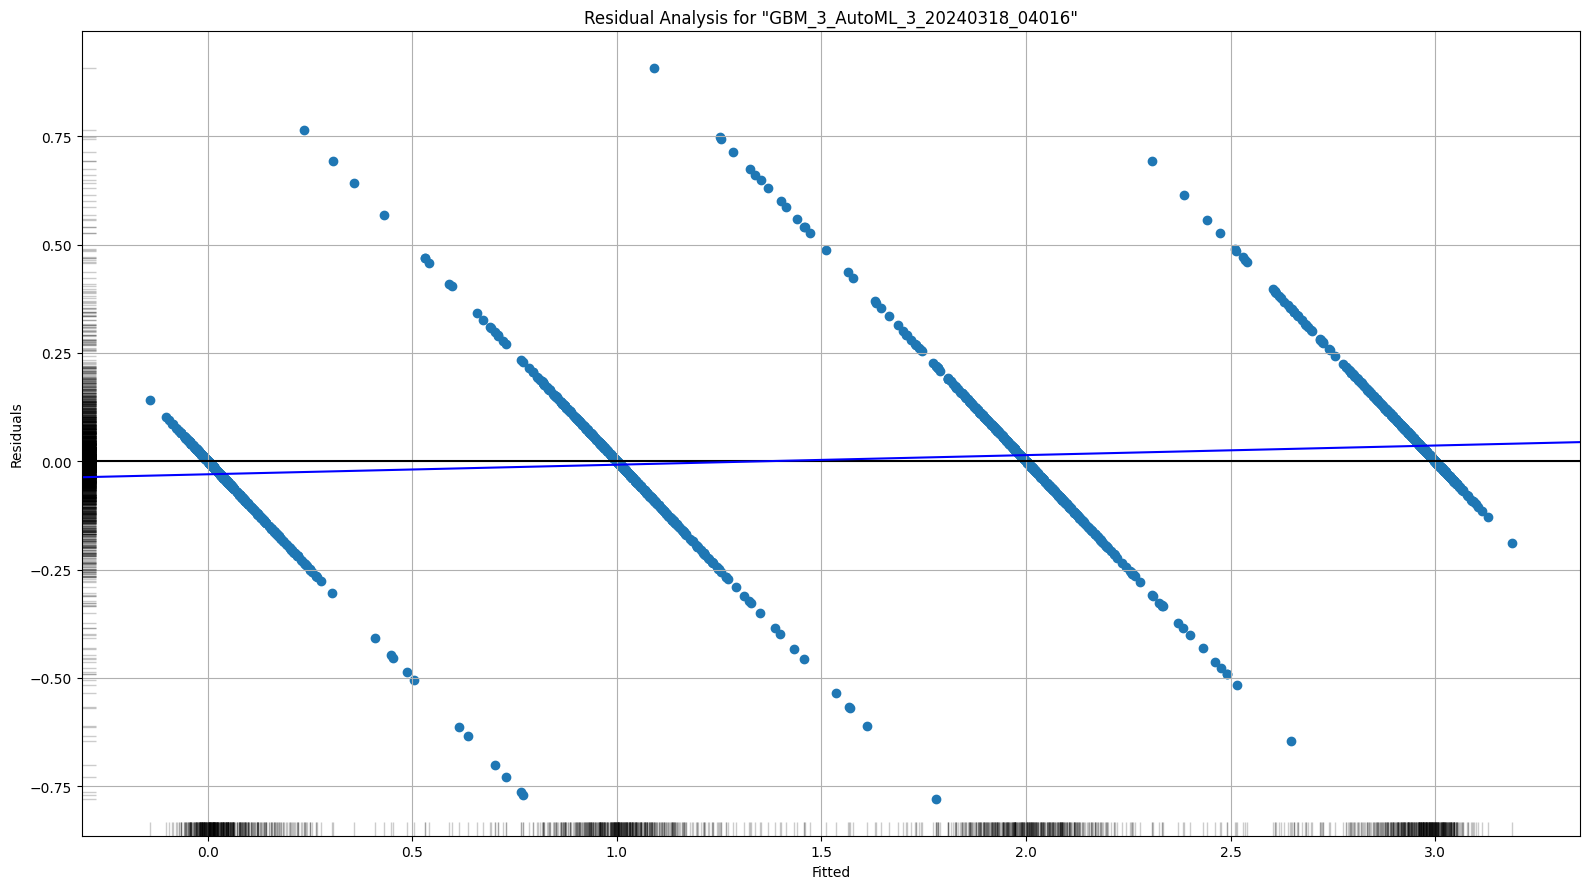

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

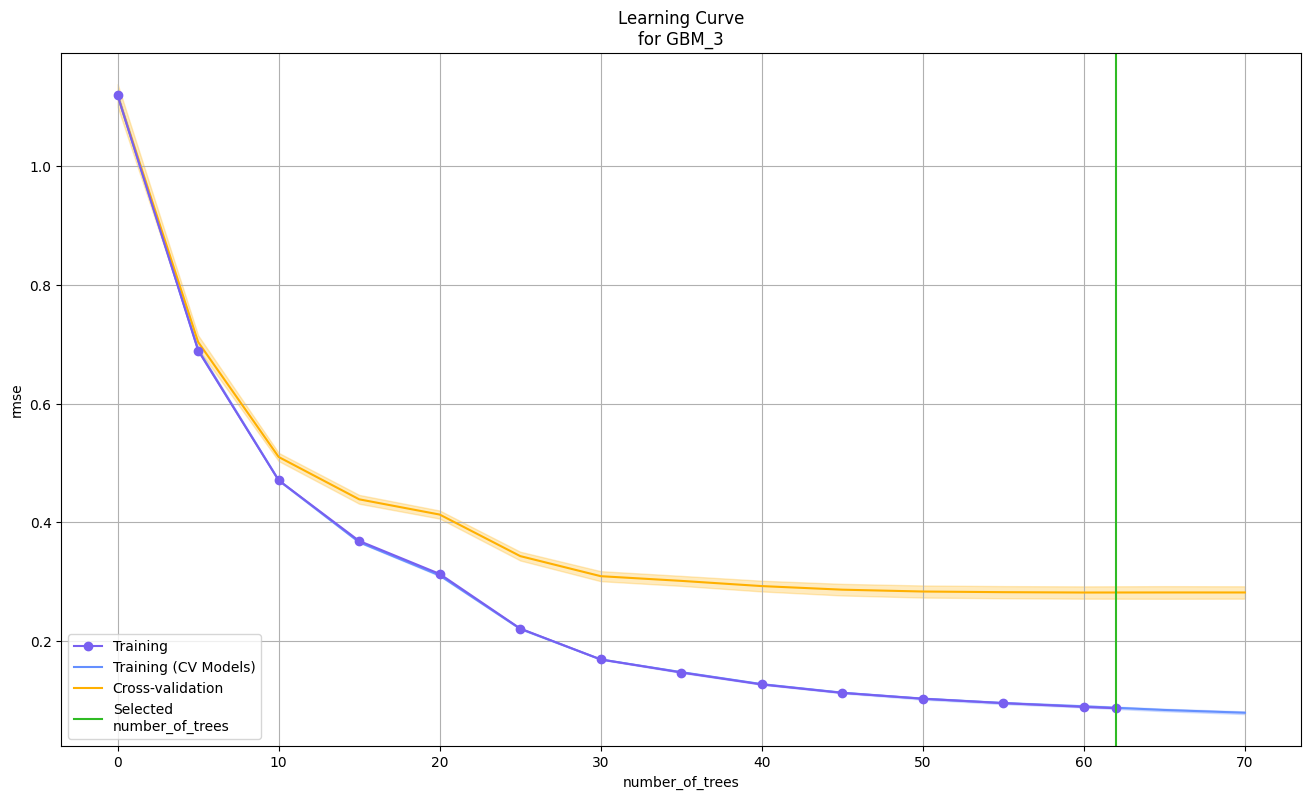

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

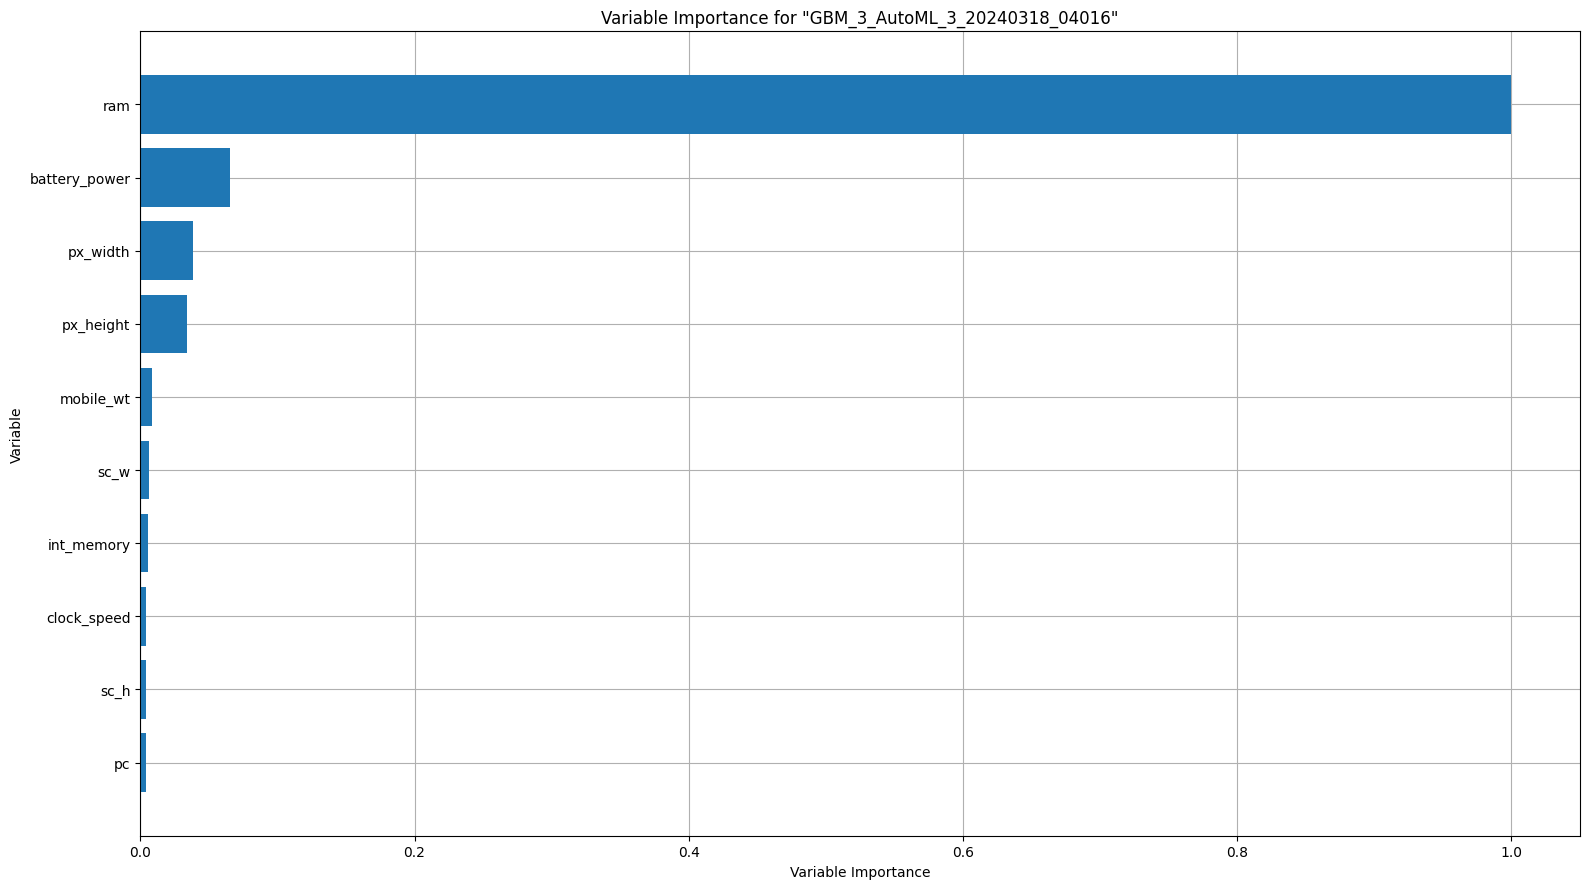

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

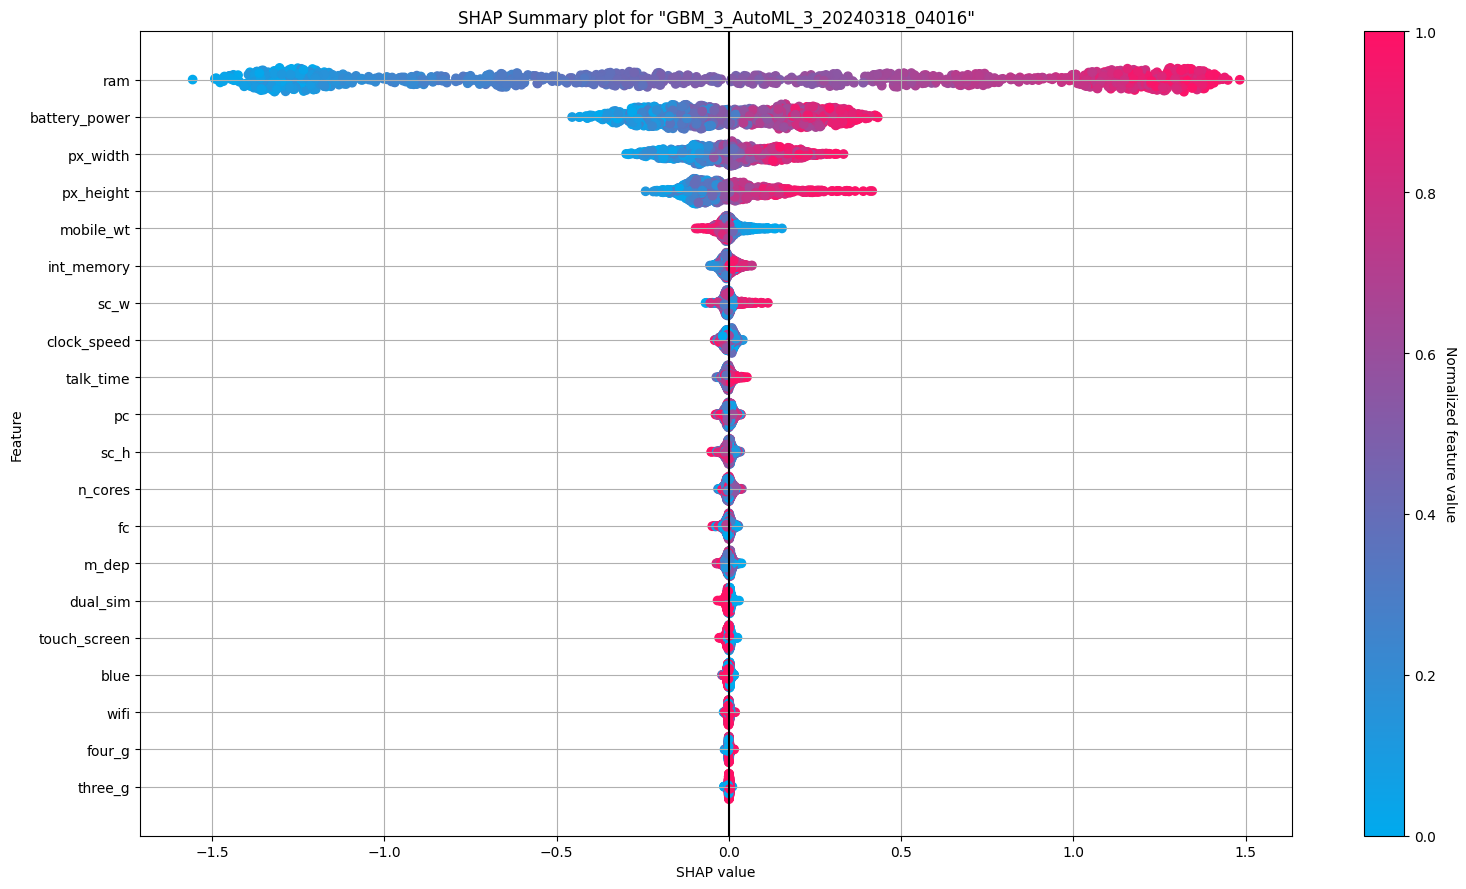

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

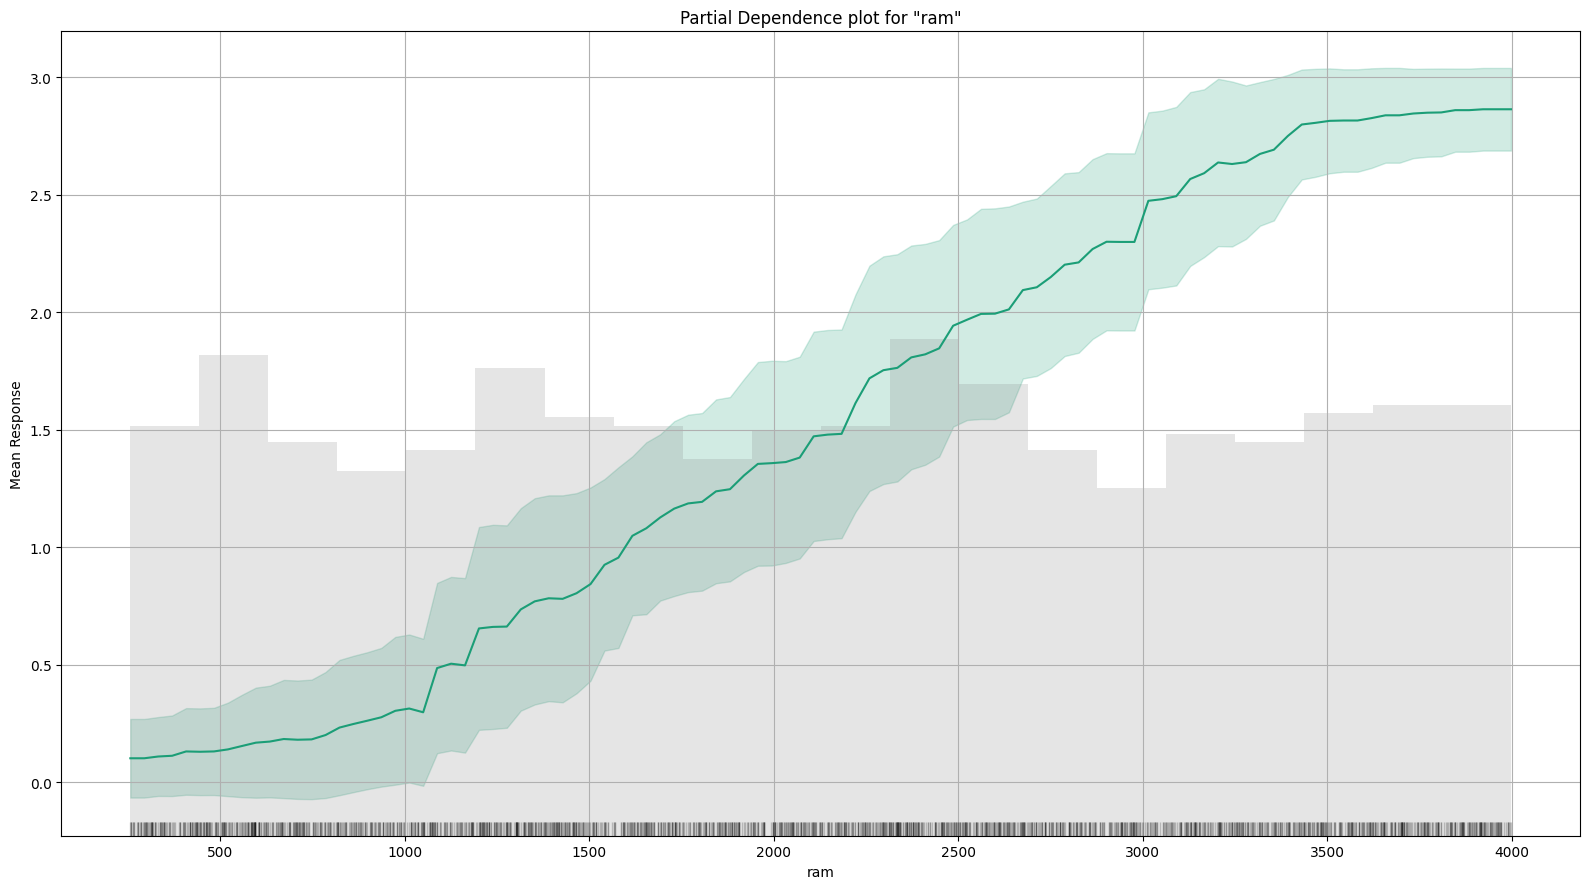

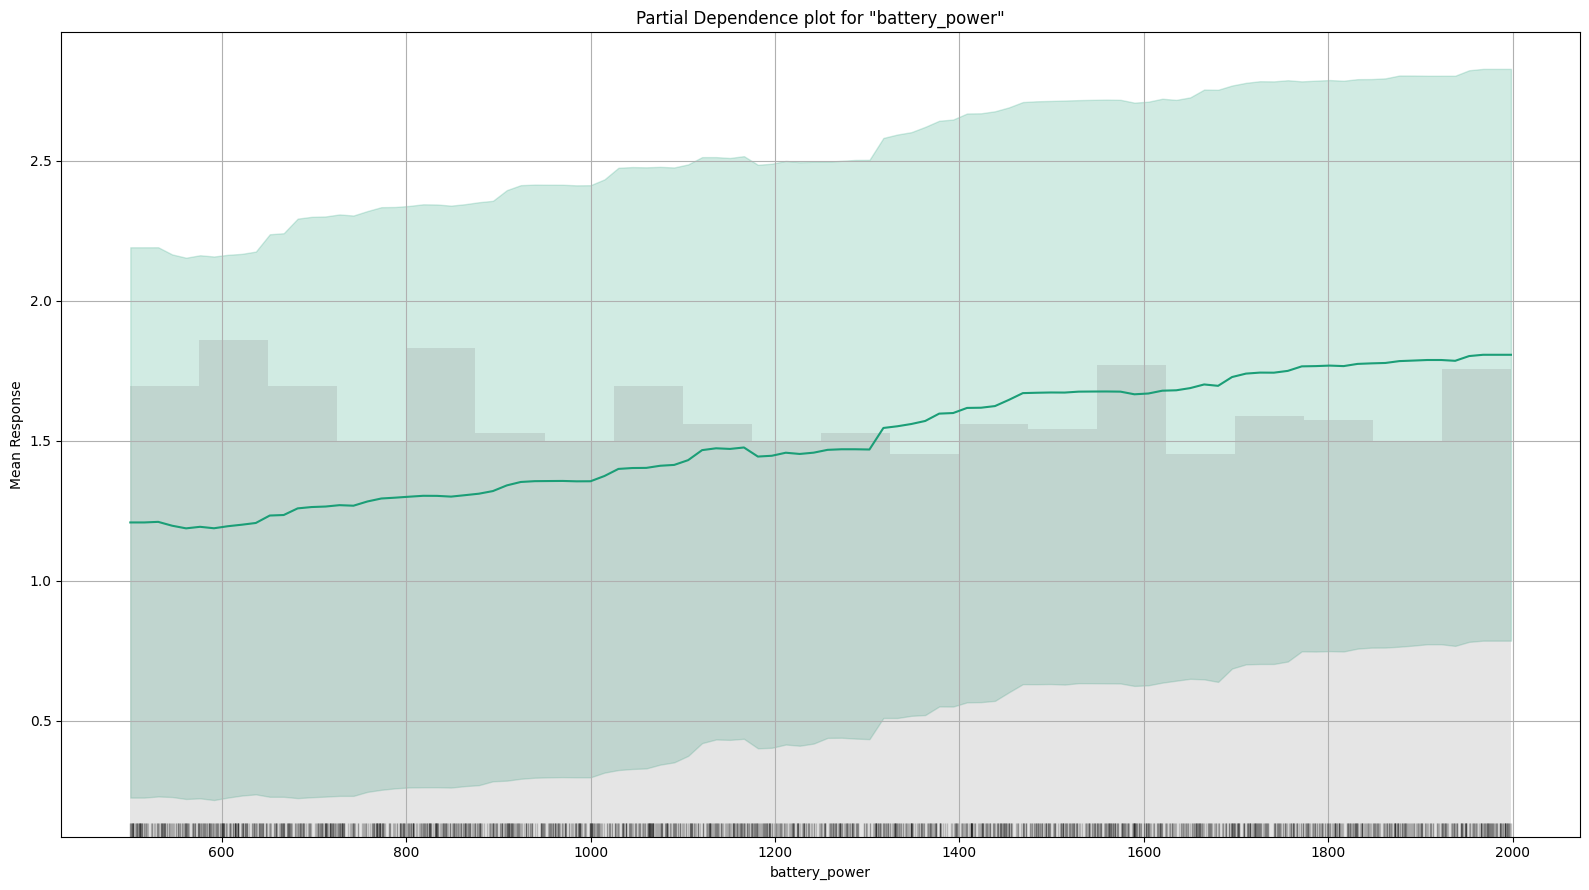

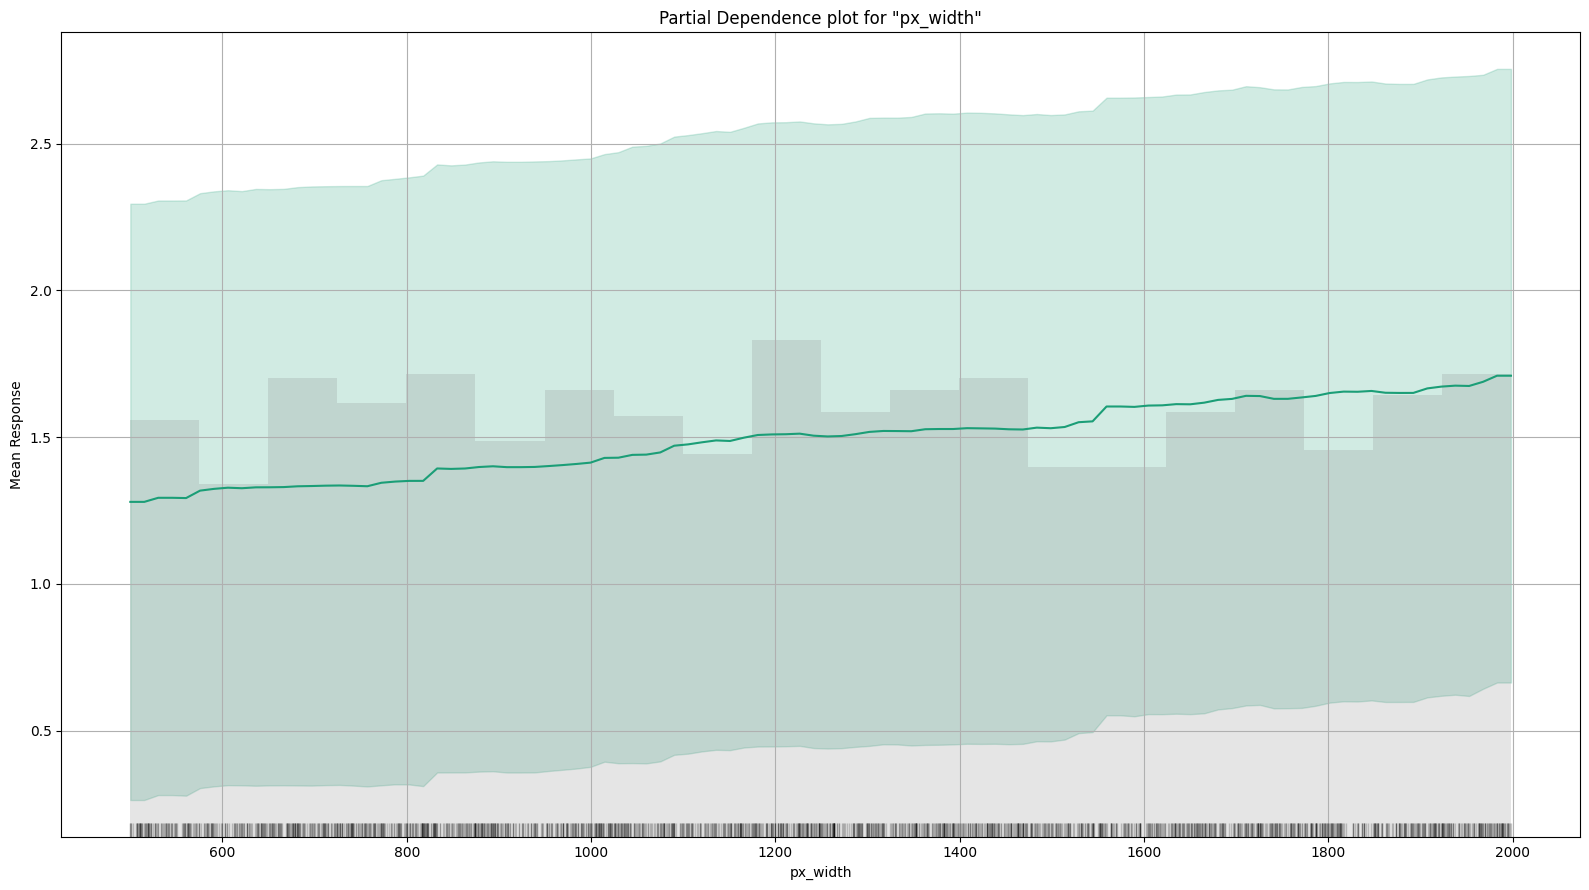

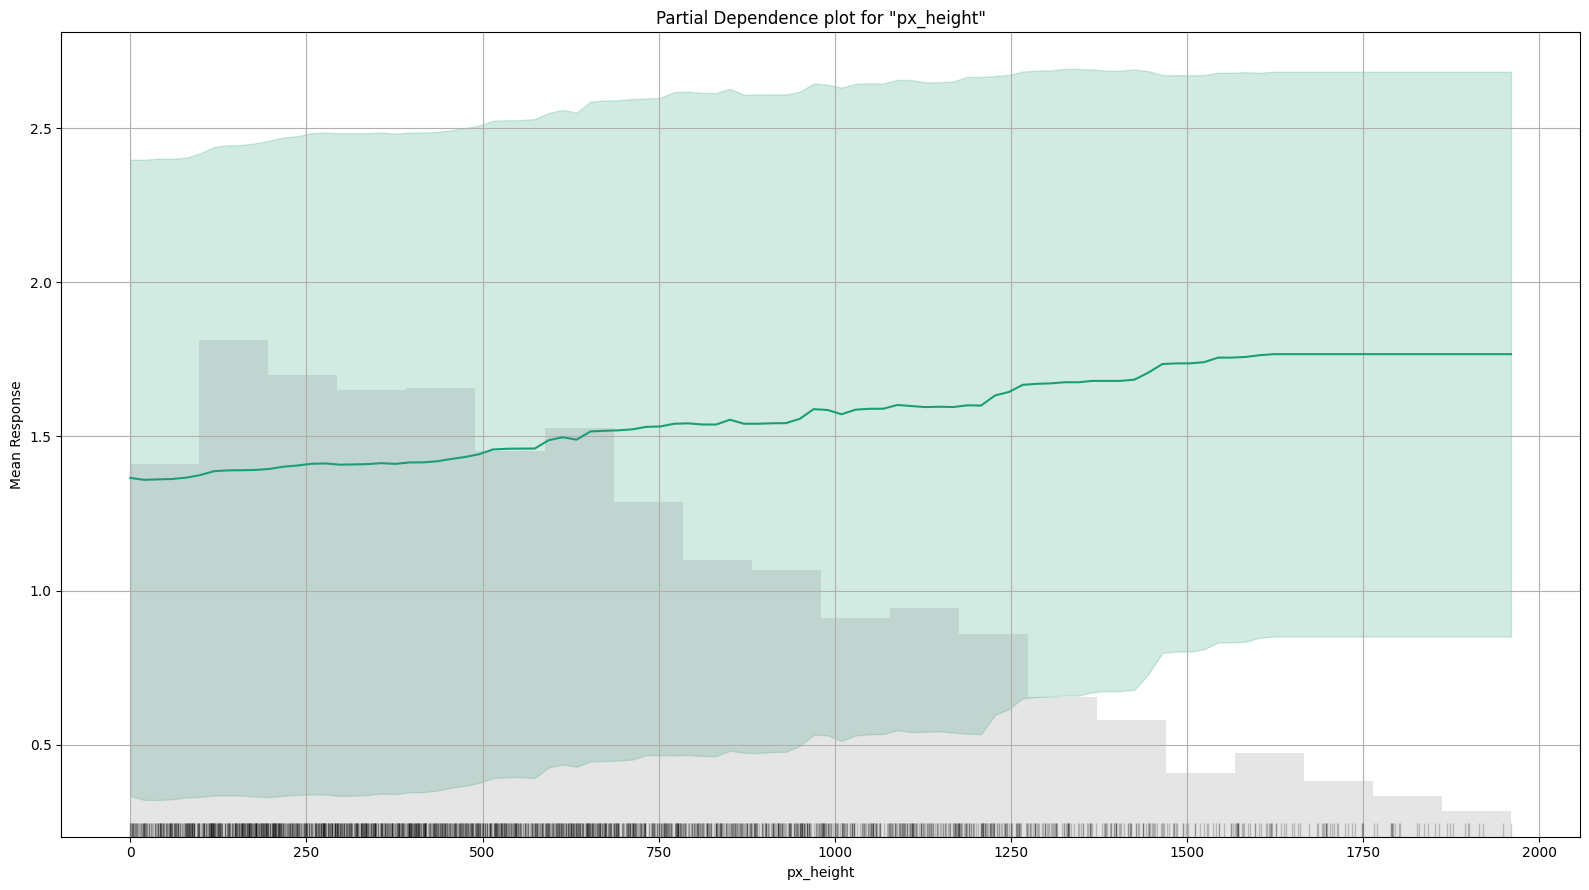

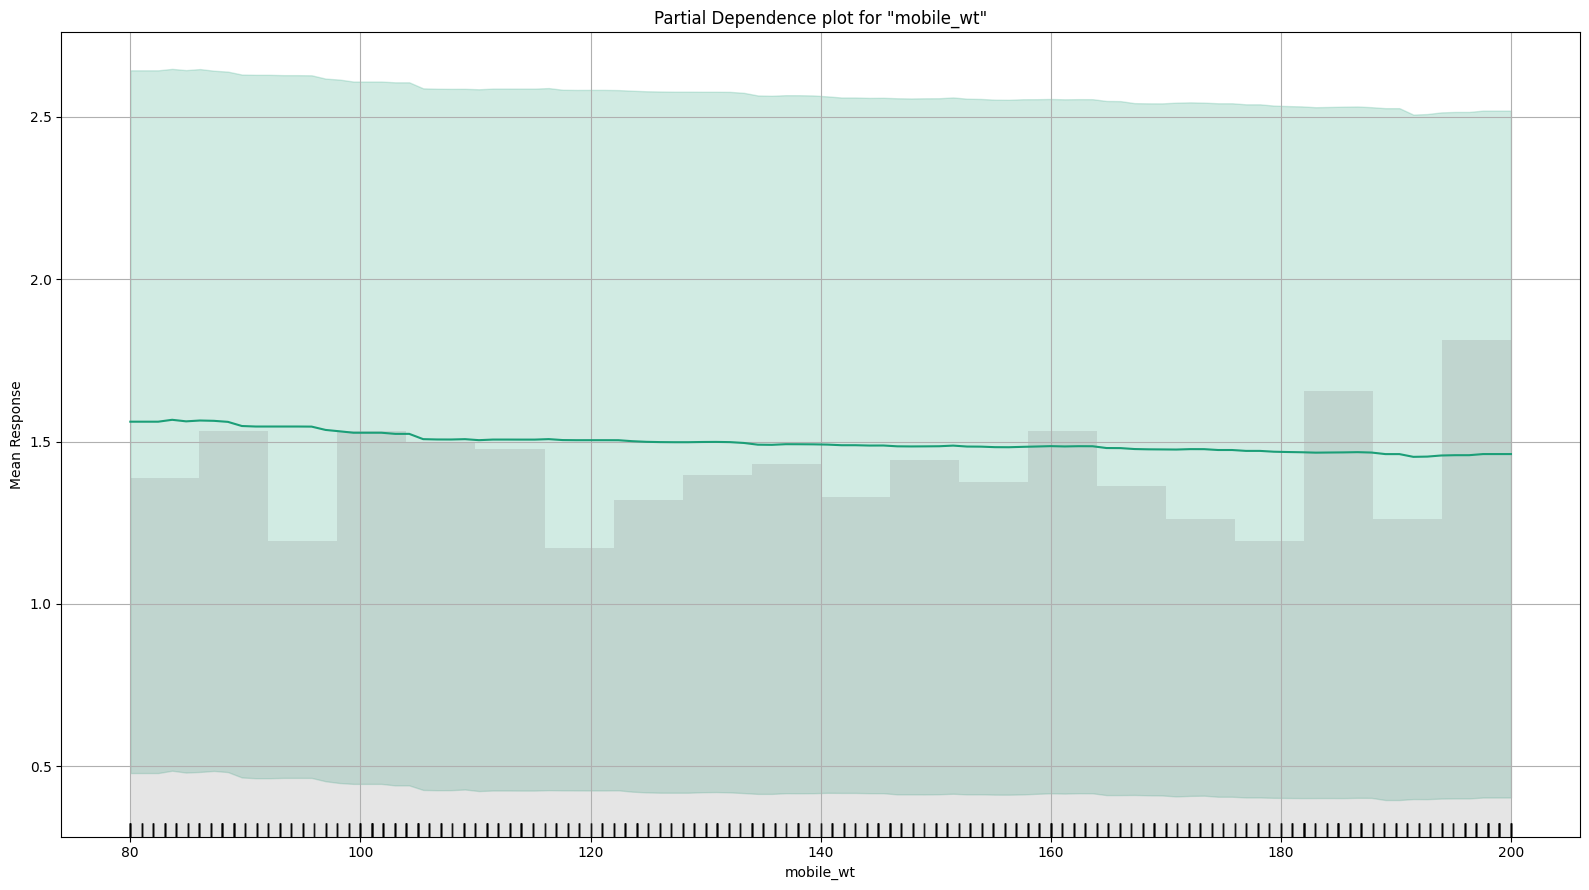

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

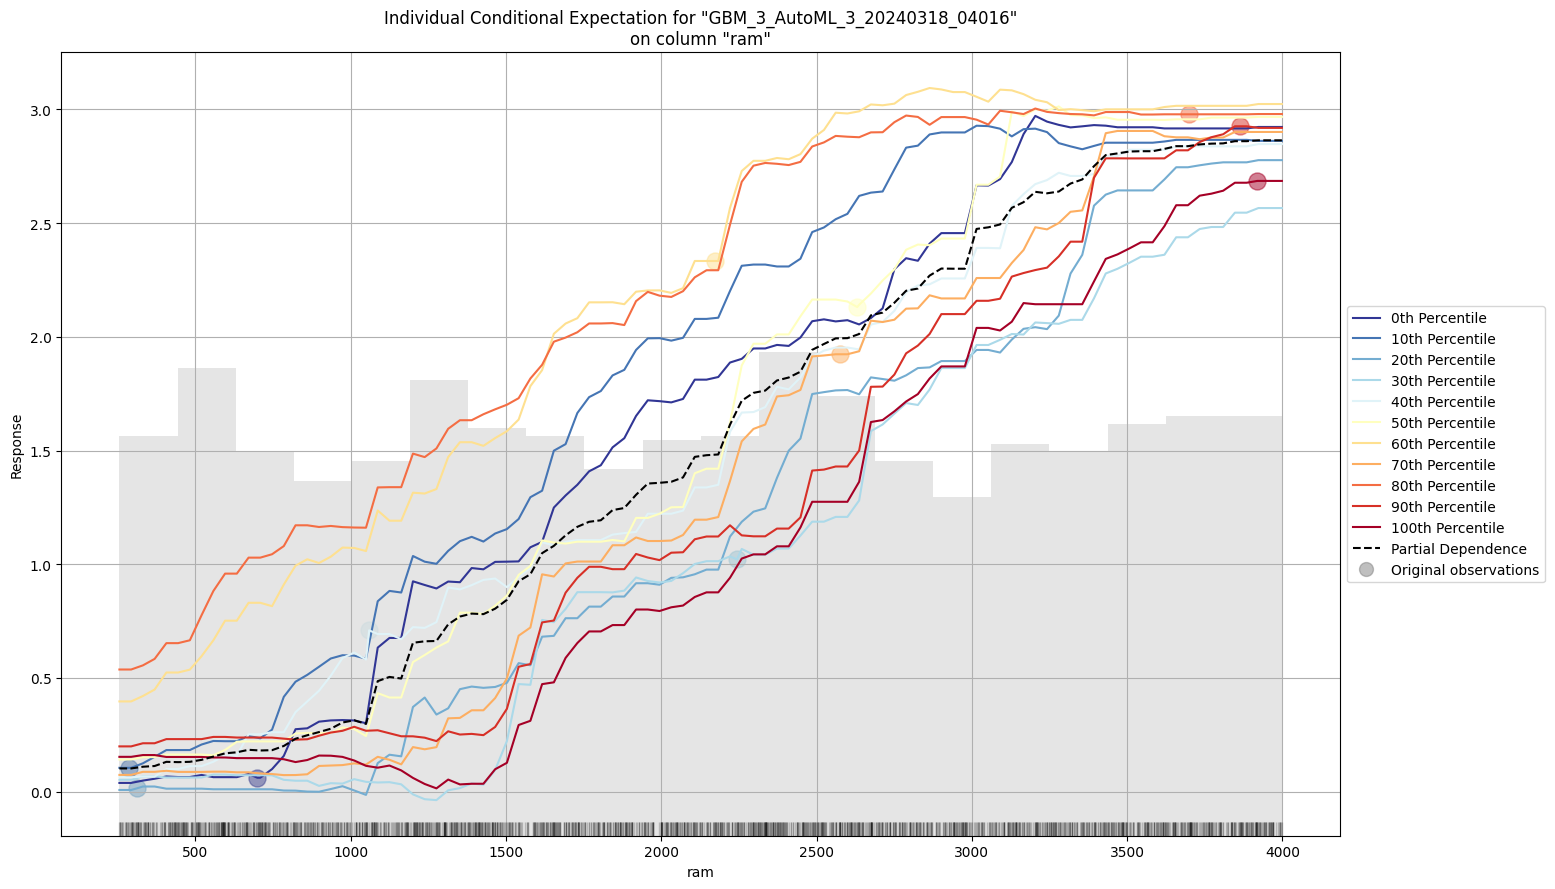

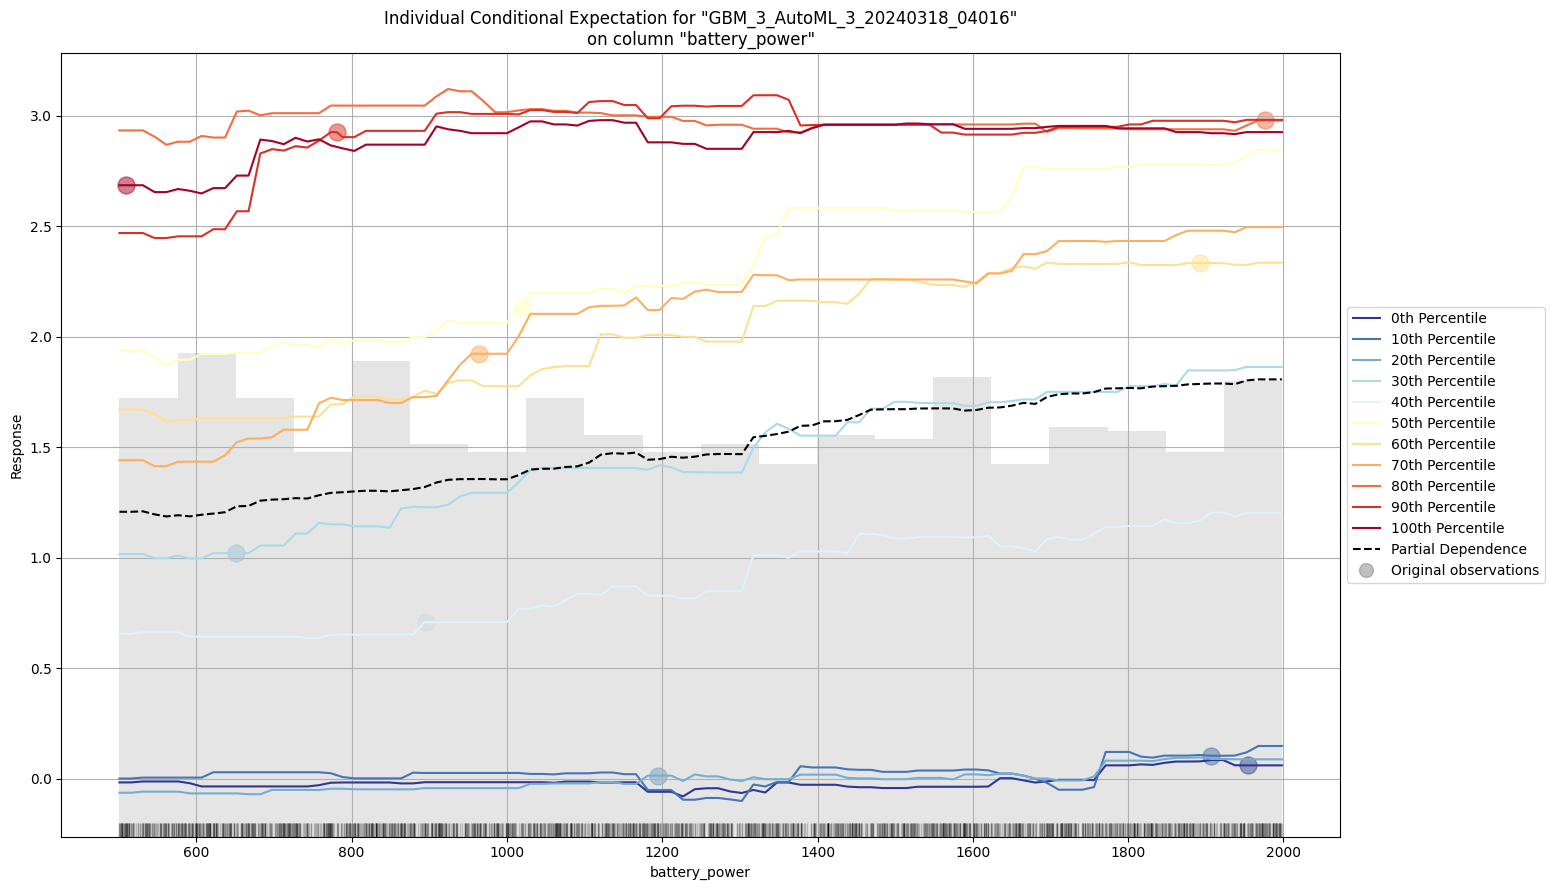

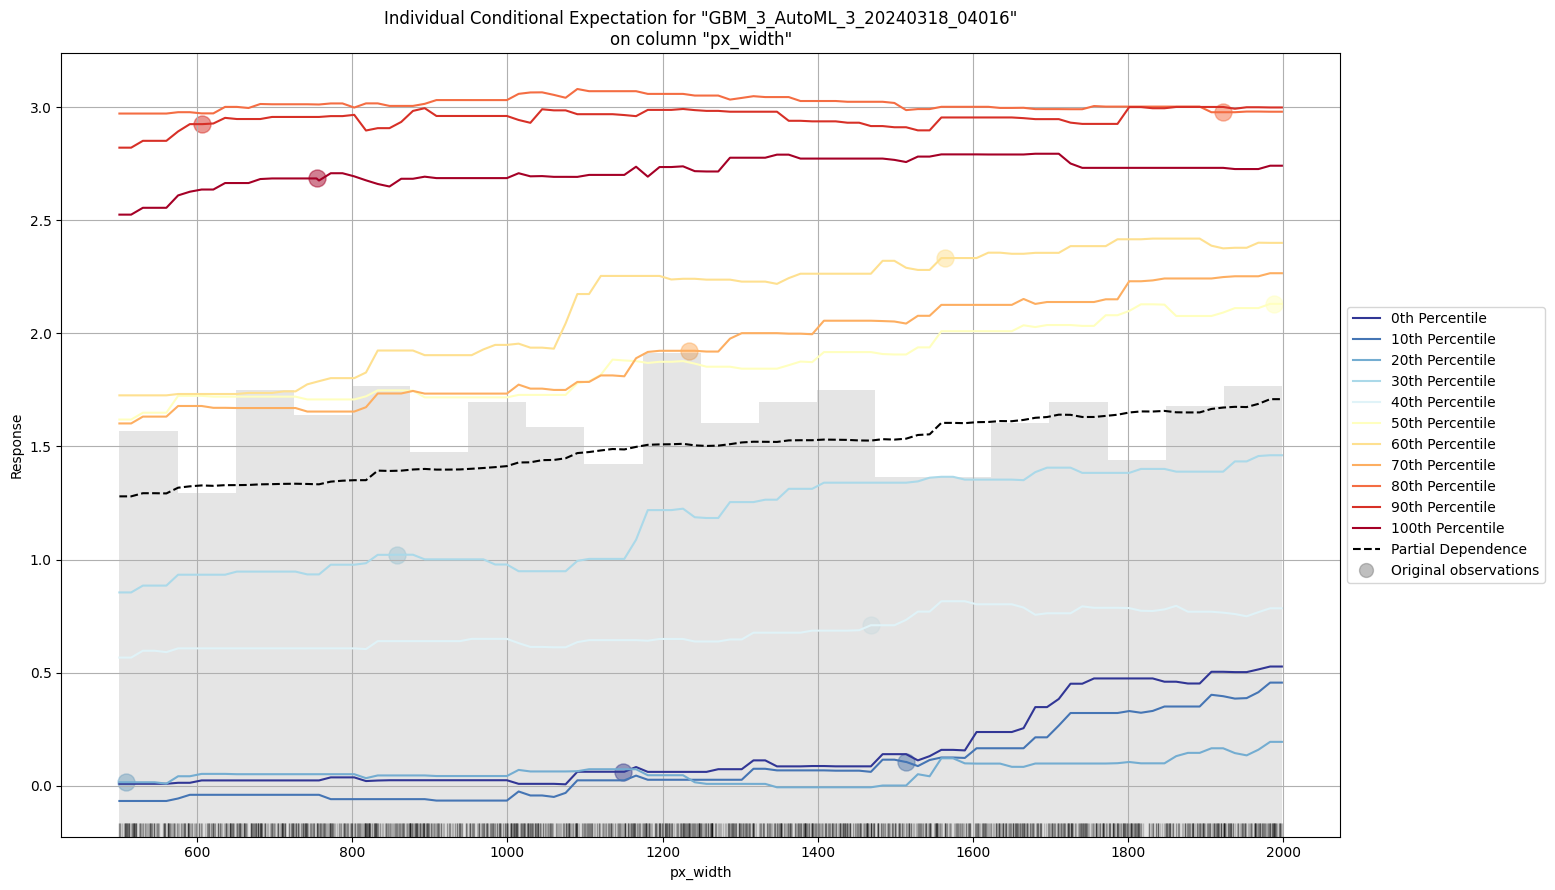

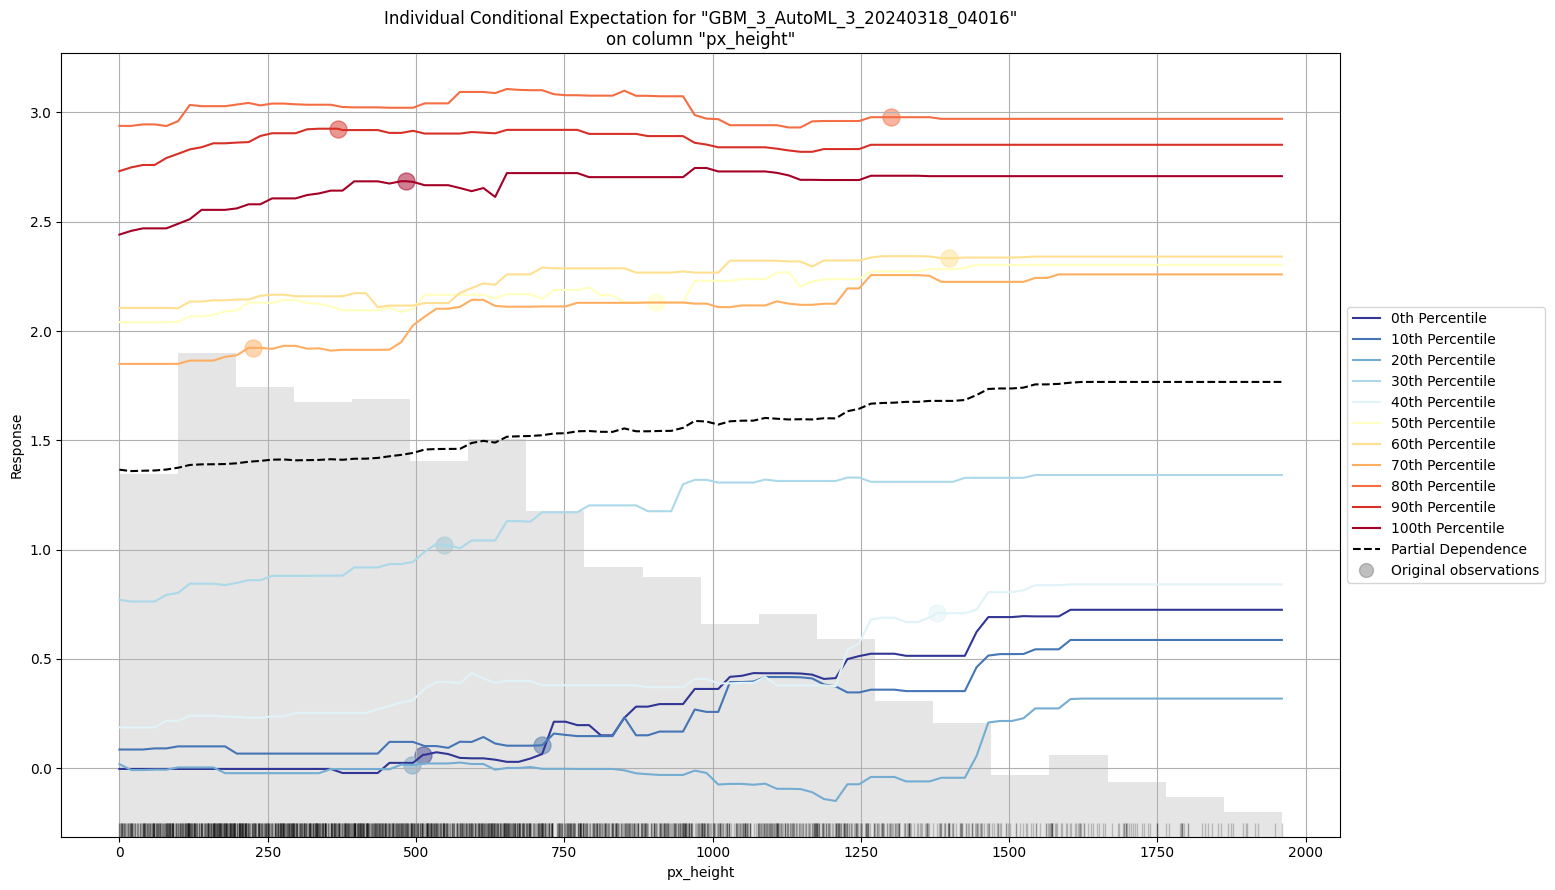

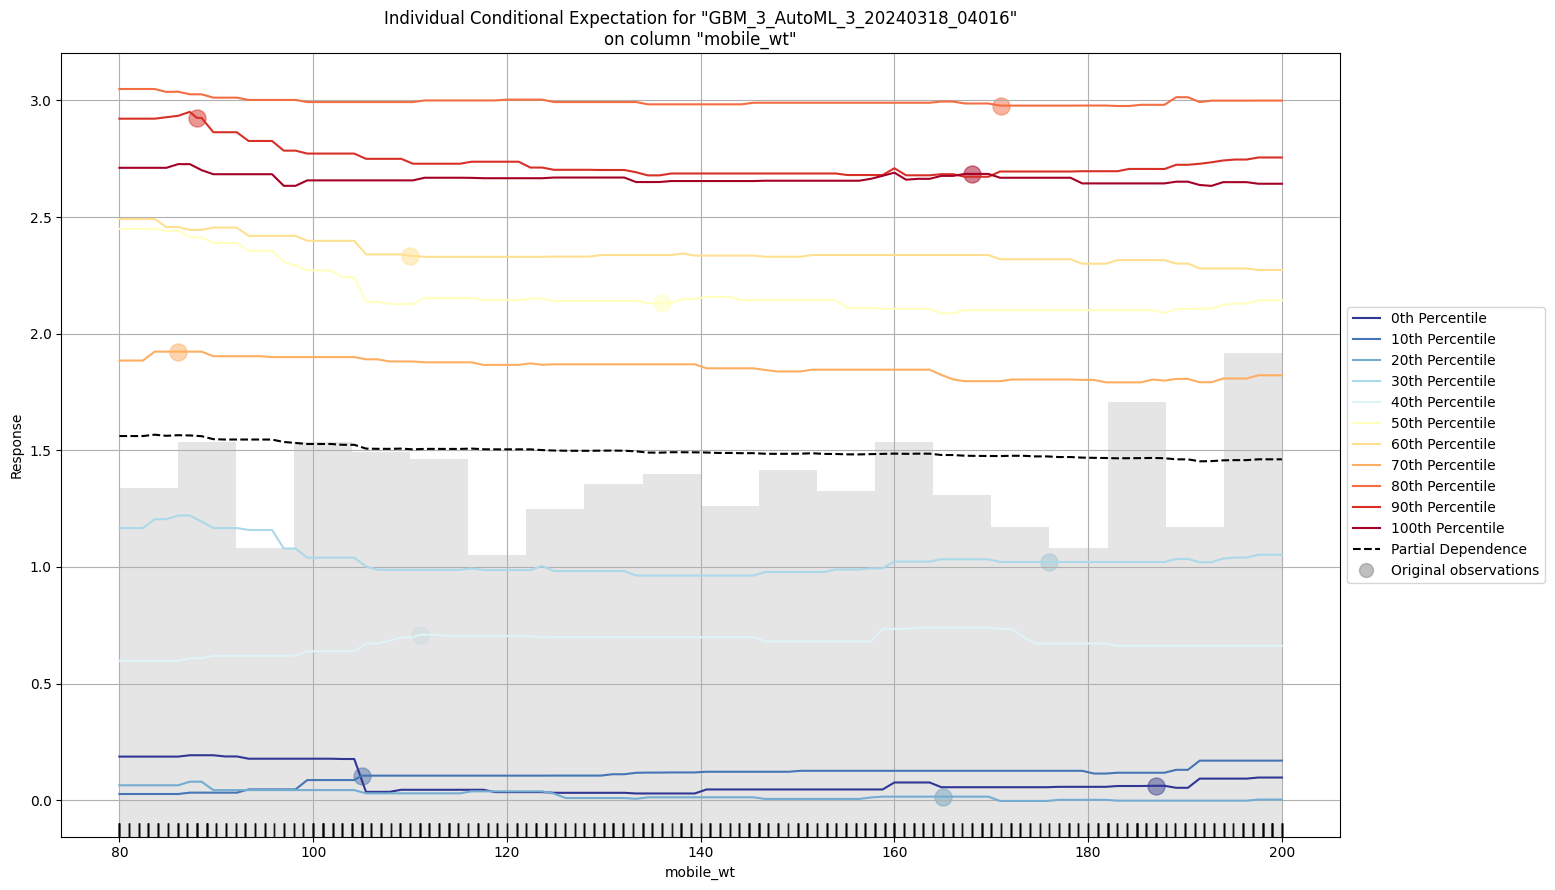

In [61]:
model = h2o.get_model(model_id)

shap_values = model.explain(data)

Interpretation of the above plots

* Residual analysis:
As it can be seen there is presence of some striped lines which indicates that it predicts some values better than others but there is room for improvement
* Learning curve plot:
based on the learning curve plot, the cross validation curve has a higher mse, which suggests that while the model performs well on training data but not on new data.
* variable importance plot:
it shows the relative importance of the most important variables for the model. as predicted before using correlation the important variables are in the same order
* shap summary plot:
the features are arranged in order of importance. the higher the ram/battery power, the higher the shapely value and therefore higher predicted price range class
* pdp:
the steepness of the line indicates the strength of its relationship. converly a flatter slope suggests a weaker influence. here we can see ram has a steeper line and it keeps getting flatter for all other variables




Conclusion:


SHAP analysis was conducted on the above models to gain insights into feature importance and contributions to individual predictions for the overall dataset. Considering the correlation matrix above and shap feature importance plots, it can be seen that there is a consistency in the most important variable prediction.

References
* https://github.com/aiskunks/aiskunks/tree/main/AISkunks/What_We_Have_Done#Articles
* https://christophm.github.io/interpretable-ml-book/shap.html
* https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

* https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1